## Simple Sequential Model for Diabetes Data Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [2]:
# Load the Diabetes dataset from Kaggle
url = r"C:\Users\krish\Downloads\stroke_data.csv\stroke_data.csv" #https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=stroke_data.csv
column_names = ['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
data = pd.read_csv(url,skiprows=[0], names=column_names)

In [3]:
data.shape

(40910, 11)

In [4]:
# Split data into features and target
X = data.drop("stroke", axis=1)
y = data["stroke"]

In [5]:
print(data.dtypes)  # Check data types of all columns
print(data.isnull().sum())  # Check for missing values

sex                    int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build the Sequential model
model = keras.Sequential([
    layers.Input(shape=(10,)),  # Input layer with 8 features
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),  # Hidden layer with 128 units and ReLU activation
    layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)),  # Hidden layer with 64 units and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/250
819/819 [==============================] - 1s 1ms/step - loss: 0.6208 - accuracy: 0.7098 - val_loss: 0.5723 - val_accuracy: 0.7302
Epoch 2/250
819/819 [==============================] - 1s 929us/step - loss: 0.5549 - accuracy: 0.7382 - val_loss: 0.5310 - val_accuracy: 0.7388
Epoch 3/250
819/819 [==============================] - 1s 926us/step - loss: 0.5230 - accuracy: 0.7572 - val_loss: 0.5034 - val_accuracy: 0.7690
Epoch 4/250
819/819 [==============================] - 1s 1ms/step - loss: 0.5016 - accuracy: 0.7734 - val_loss: 0.4926 - val_accuracy: 0.7736
Epoch 5/250
819/819 [==============================] - 1s 1ms/step - loss: 0.4837 - accuracy: 0.7882 - val_loss: 0.4760 - val_accuracy: 0.7951
Epoch 6/250
819/819 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7994 - val_loss: 0.4510 - val_accuracy: 0.8170
Epoch 7/250
819/819 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.8122 - val_loss: 0.4543 - val_accuracy: 0.

Epoch 58/250
819/819 [==============================] - 2s 2ms/step - loss: 0.2734 - accuracy: 0.9242 - val_loss: 0.2740 - val_accuracy: 0.9256
Epoch 59/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2793 - accuracy: 0.9195 - val_loss: 0.2775 - val_accuracy: 0.9244
Epoch 60/250
819/819 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.9241 - val_loss: 0.2854 - val_accuracy: 0.9256
Epoch 61/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2744 - accuracy: 0.9236 - val_loss: 0.2878 - val_accuracy: 0.9039
Epoch 62/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.9257 - val_loss: 0.2925 - val_accuracy: 0.9169
Epoch 63/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2735 - accuracy: 0.9238 - val_loss: 0.2797 - val_accuracy: 0.9175
Epoch 64/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.9265 - val_loss: 0.2810 - val_accuracy:

Epoch 115/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2451 - accuracy: 0.9359 - val_loss: 0.2481 - val_accuracy: 0.9410
Epoch 116/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2441 - accuracy: 0.9379 - val_loss: 0.2522 - val_accuracy: 0.9354
Epoch 117/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.9397 - val_loss: 0.2443 - val_accuracy: 0.9430
Epoch 118/250
819/819 [==============================] - 2s 2ms/step - loss: 0.2402 - accuracy: 0.9392 - val_loss: 0.2743 - val_accuracy: 0.9293
Epoch 119/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2455 - accuracy: 0.9348 - val_loss: 0.2473 - val_accuracy: 0.9433
Epoch 120/250
819/819 [==============================] - 2s 2ms/step - loss: 0.2444 - accuracy: 0.9374 - val_loss: 0.2355 - val_accuracy: 0.9478
Epoch 121/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2412 - accuracy: 0.9385 - val_loss: 0.2412 - val_ac

819/819 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9455 - val_loss: 0.2410 - val_accuracy: 0.9424
Epoch 172/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2287 - accuracy: 0.9427 - val_loss: 0.2401 - val_accuracy: 0.9413
Epoch 173/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9457 - val_loss: 0.2142 - val_accuracy: 0.9562
Epoch 174/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2291 - accuracy: 0.9442 - val_loss: 0.2299 - val_accuracy: 0.9435
Epoch 175/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9454 - val_loss: 0.2251 - val_accuracy: 0.9464
Epoch 176/250
819/819 [==============================] - 2s 2ms/step - loss: 0.2247 - accuracy: 0.9457 - val_loss: 0.2719 - val_accuracy: 0.9313
Epoch 177/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2273 - accuracy: 0.9448 - val_loss: 0.2491 - val_accuracy: 0.9332

819/819 [==============================] - 2s 2ms/step - loss: 0.2160 - accuracy: 0.9498 - val_loss: 0.2203 - val_accuracy: 0.9574
Epoch 228/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2145 - accuracy: 0.9491 - val_loss: 0.2504 - val_accuracy: 0.9348
Epoch 229/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2158 - accuracy: 0.9496 - val_loss: 0.2167 - val_accuracy: 0.9482
Epoch 230/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9496 - val_loss: 0.2091 - val_accuracy: 0.9569
Epoch 231/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2177 - accuracy: 0.9486 - val_loss: 0.2704 - val_accuracy: 0.9088
Epoch 232/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.9503 - val_loss: 0.2124 - val_accuracy: 0.9588
Epoch 233/250
819/819 [==============================] - 1s 2ms/step - loss: 0.2163 - accuracy: 0.9491 - val_loss: 0.2192 - val_accuracy: 0.9464

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_acc:.4f}")

256/256 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.9231
Test accuracy: 0.9231


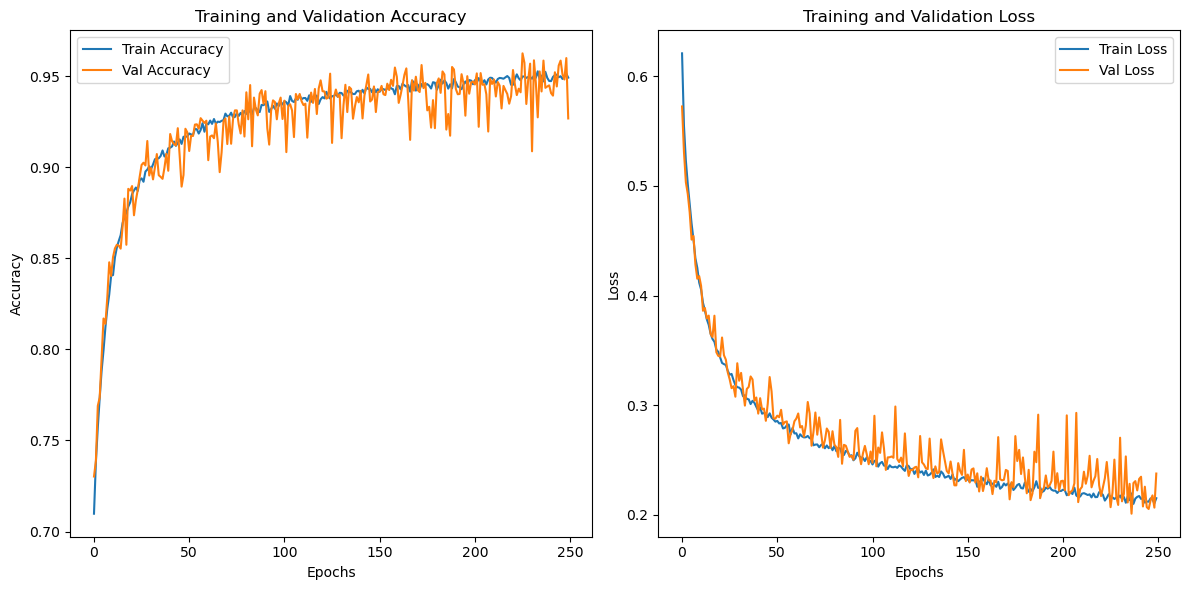

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()